In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# KNN classification of penguins.  Hey, you look kind of like that one, and 
# they're a Gentoo, so...

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [ ]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
# !curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

In [ ]:
# Check that the download was data and not a webpage with an error...
# !head penguins.json

In [44]:
penguins = pd.read_json("../data/penguins.json")

In [45]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "../data/penguins_train.csv")
penguins_test = pd.read_csv( "../data/penguins_test.csv")
penguins = penguins_train


In [46]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       117
 Gentoo        92
 Chinstrap     48
 Name: Species, dtype: int64,
 257)

In [47]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

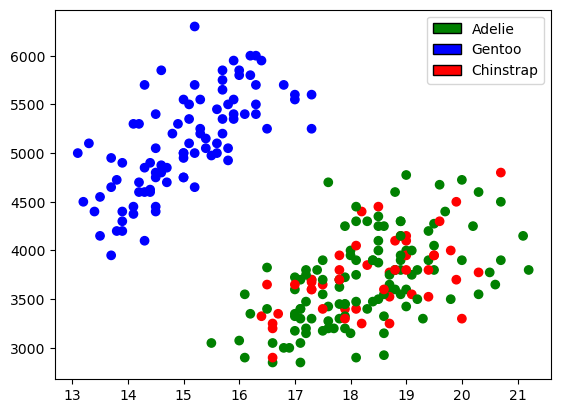

In [48]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

/Users/Shared/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

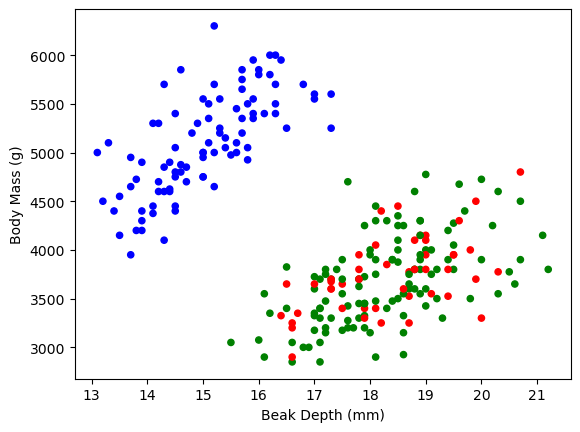

In [49]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [50]:
# Since I have to clean.. and I have to clean training and test,
# put all the essential cleaning in a funciton and call it three times.

def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguins_test = penguincleanit(penguins_test)
penguins_train = penguincleanit(penguins_train)

In [51]:
penguinclean.LABEL.value_counts()


0    116
1     91
2     48
Name: LABEL, dtype: int64

In [52]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(117, 92, 48)

In [ ]:
len(penguins)

/Users/Shared/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


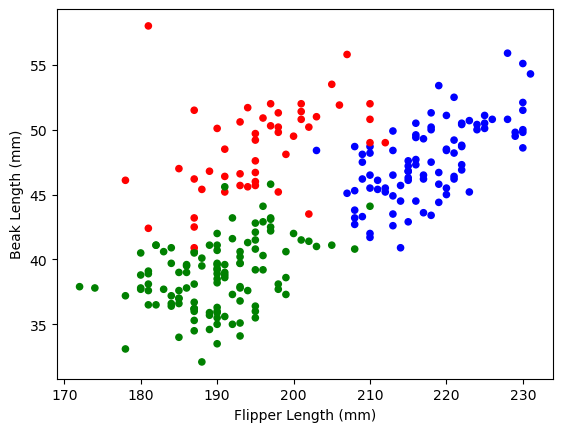

In [53]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [1]:
from sklearn.neighbors import KNeighborsClassifier


In [54]:
labels= penguins_train.LABEL
X = penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XTEST = penguins_test[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
YTEST = penguins_test["LABEL"]

In [55]:
np.isnan(X).sum()

0

In [56]:
fit = KNeighborsClassifier().fit(X, labels)  # default n=5

In [57]:
dir(fit)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fi

In [58]:
fit.predict(XTEST)

array([1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0])

In [59]:
penguins_test["KNN"] = fit.predict(XTEST)

In [60]:
penguins_test.groupby(["KNN", "LABEL"]).LABEL.count()

KNN  LABEL
0    0        29
     1         1
     2        11
1    0         3
     1        31
     2         1
2    0         3
     2         8
Name: LABEL, dtype: int64

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix( YTEST, fit.predict(XTEST))

array([[29,  3,  3],
       [ 1, 31,  0],
       [11,  1,  8]])

In [ ]:
len(XTEST)

In [65]:
# Ok, I get a confusion matrix this way.
# Crude accuracy... 
acc = ( 29 + 31 + 8 ) / 87
acc

0.7816091954022989

In [ ]:
# What is my task?  Compare KNN accuracy on test set vs k.

In [ ]:
# What do I need to do that ?  A function that returns 
# overall accuracy.  

In [66]:
XTEST[0:5]

array([[  13.8, 4750. ,   44.9,  212. ],
       [  15. , 5500. ,   49.1,  228. ],
       [  15.3, 5550. ,   50. ,  220. ],
       [  18.4, 3400. ,   50.5,  200. ],
       [  17.2, 3550. ,   39.6,  196. ]])

In [67]:
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()

In [77]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1*1.05, ygrid[j], xgrid[i]])
       # print(x)
        z[i,j]= fit.predict(x[np.newaxis,:])

(30, 29) (30, 29) (30, 29)


In [69]:
XTEST[5]

array([  17. , 6050. ,   59.6,  230. ])

In [70]:
z[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [71]:
fit.predict([[  13.8, 4206 ,  54. ,         222.         ]])

array([0])

(array([ 2., 19., 40., 60., 28., 11., 31., 29., 23., 12.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

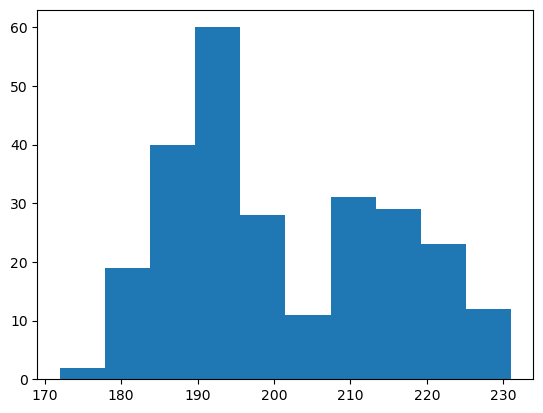

In [72]:
plt.hist(penguins_train["Flipper Length (mm)"])

Text(0, 0.5, 'Number of birds')

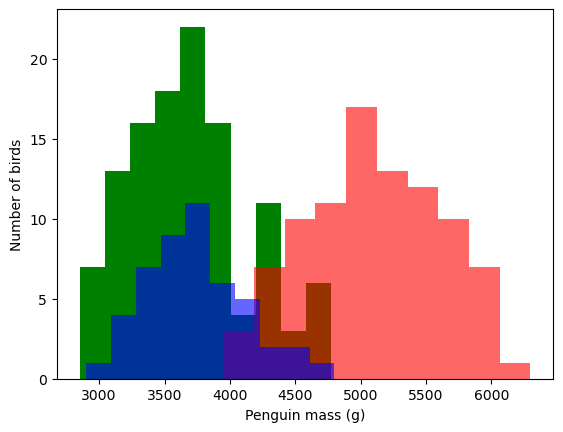

In [80]:
plt.hist(penguins_train.query("SP1==True")["Body Mass (g)"], color='g')
plt.hist(penguins_train.query("SP2==True")["Body Mass (g)"], color='r', alpha=0.6)
plt.hist(penguins_train.query("SP3==True")["Body Mass (g)"], color='b', alpha=0.6)
plt.xlabel("Penguin mass (g)")
plt.ylabel("Number of birds")

In [75]:
fit.predict([XTEST[0 ]])

array([1])

Text(0, 0.5, 'Flipper Length (mm)')

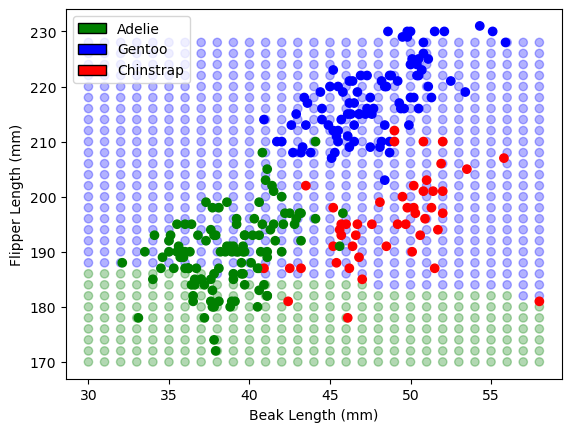

In [79]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"} 
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

In [ ]:
plt.hist(penguins_train["Body Mass (g)"])

In [ ]:
plt.hist(penguins_train["Beak Depth (mm)"])

In [82]:
np.cov(X).shape

(255, 255)

In [83]:
np.cov(X.T)

array([[ 3.62418620e+00, -7.48681566e+02, -2.67803566e+00,
        -1.58956230e+01],
       [-7.48681566e+02,  6.66543886e+05,  2.82199537e+03,
         1.02653949e+04],
       [-2.67803566e+00,  2.82199537e+03,  3.02672759e+01,
         5.34575498e+01],
       [-1.58956230e+01,  1.02653949e+04,  5.34575498e+01,
         2.07505790e+02]])

In [88]:
# When I first saw this I was concerned, and tried fussing with 
# the mean2 and mean3 ... before I remembered, KNN calculates distance
# by default using Pythagoras's theorem... using Euclid's distance.

# Which for penguins is some unholy mixture of sqrt( mm^2 + g^2 )


In [89]:
# How do I specify Mahalanobis metric to KNNC? 

# https://github.com/yzhao062/pyod/issues/23
# KNeighborsClassifier(metric= 'mahalanobis', metric_params={'V': np.cov(X.T)} )
fit2 = KNeighborsClassifier(metric= 'mahalanobis', metric_params={'V': np.cov(X.T)}, n_neighbors=11 ).fit(X, labels )

In [85]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z2 = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        z2[i,j]= fit2.predict(x[np.newaxis,:])

(30, 29) (30, 29) (30, 29)


In [86]:
z2[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

Text(0, 0.5, 'Flipper Length (mm)')

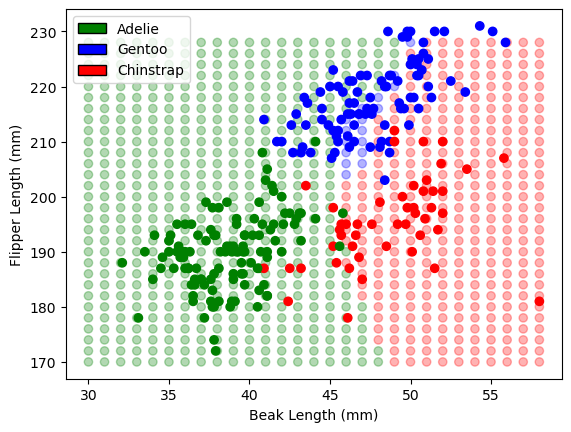

In [87]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"}  # SP1 is is-it-Adelie
c2 = [colorsnum[i] for i in z2.reshape(-1)]
plt.scatter(yax,xax, color=c2, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

In [91]:
# It seems like this n=5 classifer does something now..
penguins_test["KNN5M"] = fit2.predict(XTEST)

In [92]:
penguins_test.groupby(["KNN5M", "LABEL"]).LABEL.count()

KNN5M  LABEL
0      0        35
1      1        32
2      2        20
Name: LABEL, dtype: int64

In [94]:
confusion_matrix(YTEST, fit2.predict(XTEST))

array([[35,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 20]])

In [ ]:
# Ah.  Hmm.  That's better.

In [ ]:
# Discussion: What do you do when your accuracy is 100%?

In [ ]:
# Target:  loop over n, count accuracy on test set for variety of N.

In [ ]:
# Functions:  fit_accuracy(n) ?? 

In [95]:
def fit_accuracy(n):
    dummy = pd.DataFrame({ "LABEL": penguins_test.LABEL})
    fitresult = KNeighborsClassifier(metric= 'mahalanobis', n_neighbors=n, 
            metric_params={'V': np.cov(X.T)} ).fit(X, labels )
    predict = fitresult.predict(XTEST)
    dummy["PREDICT"] = predict
    accuracy =(dummy.query("PREDICT==0 & LABEL==0").count()[0] + 
               dummy.query("PREDICT==1 & LABEL==1").count()[0] + 
               dummy.query("PREDICT==2 & LABEL==2").count()[0]) / XTEST.shape[0]
    return(accuracy)

In [96]:
d=fit_accuracy(3)
d

0.9885057471264368

In [98]:
acc = []
for k in range(1, 201, 2):
    a = fit_accuracy(k)
    acc.append(a)
    print(k, a)

1 0.9655172413793104
3 0.9885057471264368
5 1.0
7 1.0
9 1.0
11 1.0
13 1.0
15 1.0
17 1.0
19 1.0
21 1.0
23 0.9885057471264368
25 0.9885057471264368
27 0.9885057471264368
29 0.9885057471264368
31 0.9885057471264368
33 0.9885057471264368
35 0.9885057471264368
37 0.9885057471264368
39 0.9885057471264368
41 0.9885057471264368
43 0.9885057471264368
45 0.9885057471264368
47 0.9885057471264368
49 0.9885057471264368
51 0.9885057471264368
53 0.9885057471264368
55 0.9885057471264368
57 0.9885057471264368
59 0.9885057471264368
61 0.9885057471264368
63 0.9885057471264368
65 0.9885057471264368
67 0.9885057471264368
69 0.9885057471264368
71 0.9770114942528736
73 0.9770114942528736
75 0.9770114942528736
77 0.9770114942528736
79 0.9770114942528736
81 0.9770114942528736
83 0.9770114942528736
85 0.9655172413793104
87 0.9540229885057471
89 0.9425287356321839
91 0.9425287356321839
93 0.9540229885057471
95 0.9310344827586207
97 0.9310344827586207
99 0.9310344827586207
101 0.9080459770114943
103 0.89655172413

ValueError: The 'VI' parameter is required for the mahalanobis metric when Y is passed.

In [102]:
len(acc), len(np.arange(1,201,2))

(63, 100)

In [104]:
overfit = pd.DataFrame({"k": np.arange(1,201,2)[0:63], "acc": acc})

/Users/Shared/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 0, 'k')

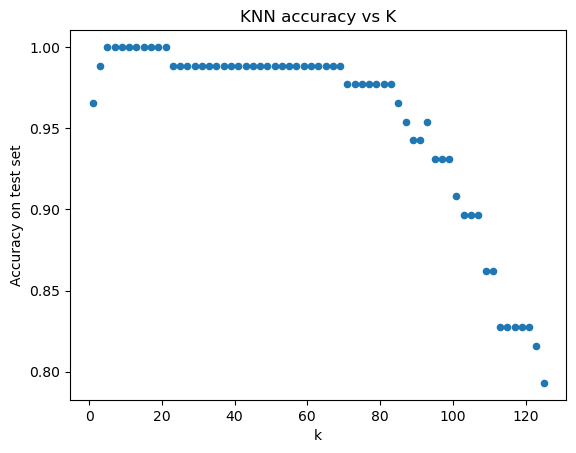

In [105]:
overfit.plot("k", "acc", kind="scatter")
plt.title("KNN accuracy vs K")
plt.ylabel("Accuracy on test set")
plt.xlabel("k")

In [ ]:
penguins